<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/opt_parm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Optimización paramétrica con Grind

Nombre: Biología de sistemas 

Fecha: 7 de diciembre

Cargar Grind.R

In [ ]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

In [ ]:
source("Grind.R")

# Optimización paramétrica

Podemos ajustar los parámetros de un modelo a datos usando la función *fit()*. Si la función es llamada sin ningún argumento, se asume que hay un *data.frame* llamado data con nombres de columnas correspondientes a las variables del modelo, y *fit()* usará el estado, *s*, y todos los parámetros, *p*, como un intento inicial para ajustar los parámetros a los datos.



La función entrega un objeto que contiene los parámetros estimados, rangos de confianza, y correlación entre los parámetros. Llamar *fit()$par* regresa los parámetros. El argumento *free* de la función permite seleccionar que parámetros serán estimados (*free* es un vector de nombres). La opción *initial = TRUE* puede ser usada para leer las condiciones iniciales de los datos. 


## Modelo de Lotka Volterra

In [16]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)),{

    dR <- r*R*(1-R/K) - a*R*N
    dN <- c*a*R*N - delta*N

    return(list(c(dR, dN)))
  })
}

En el la ecuación del recurso ($R$) el término $r*R(1-R/K)$ da cuenta de un crecimiento logístico. Mientras que el término $a*R*N$ (ley de acción de masas) implica que el consumo del recurso por el depredador ($N$) es proporcional a la cantidad de recurso. En la ecuación del depredador, el término $c*a*R*N$ implica que la velocidad de crecimiento es proporcional al consumo. Finalmente el término $delta*N$ implica una tasa de muerte constante 

Establecer valor de parámetros y condiciones iniciales

In [15]:
p <- c(r=1, K=1, a=1, c=1, delta=0.5) # vector de parámetros
s <- c(R=1, N=0.01) # vector de condiciones iniciales

Nota importante: las derivadas en la función *model()* deben ser especificadas en el mismo orden que en el vector de condiciones iniciales *s*

Los nombres *model*, *s*, y *p* son las designaciones por dafault para los valores de modelo, estado y parámetros en las funciones de Grind

Correr el modelo y hacer una gráfica de tiempo

R   N 
0.5 0.5

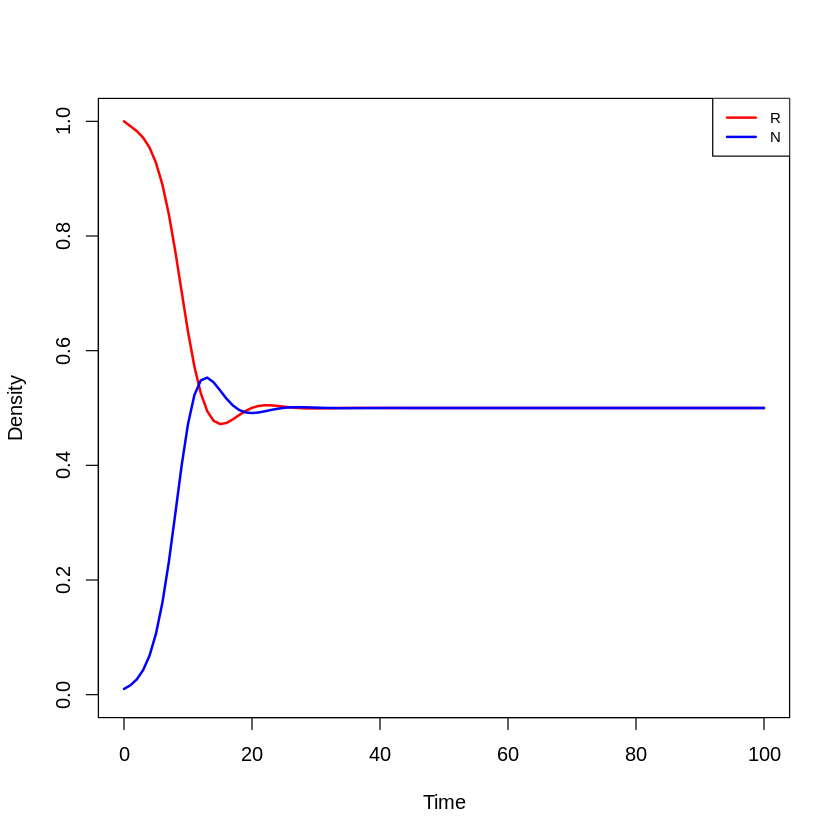

In [17]:
run()

Hacer el plano de fase, mostrando los ejes *x* y *y* de forma completa

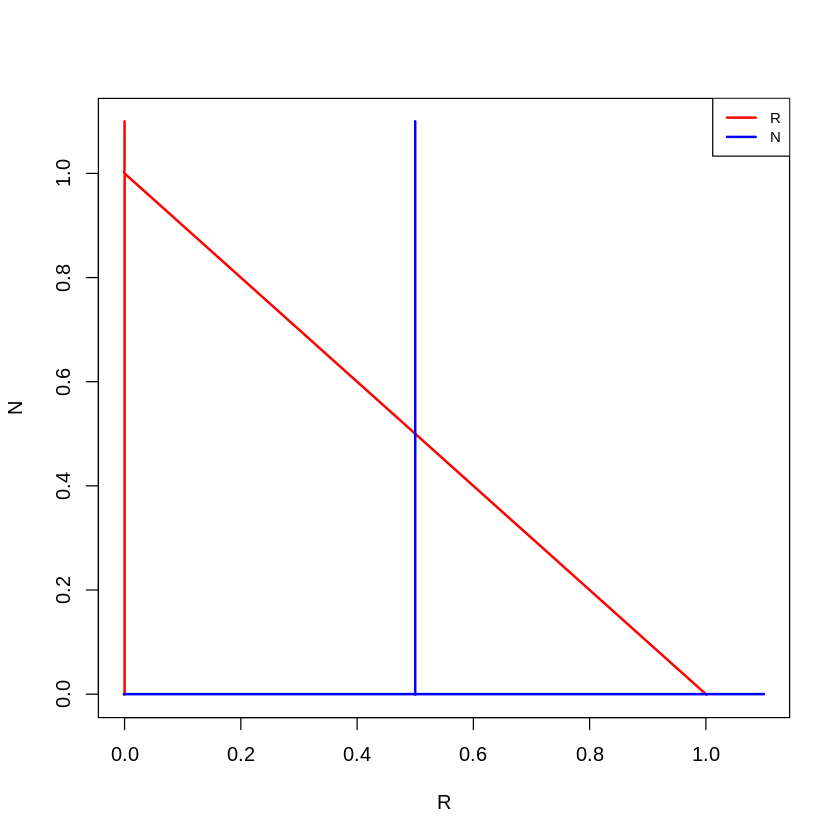

In [18]:
plane(xmin = -0.001, ymin = -0.001)

¿Qué efecto tiene cambiar el parámetro K en el modelo?

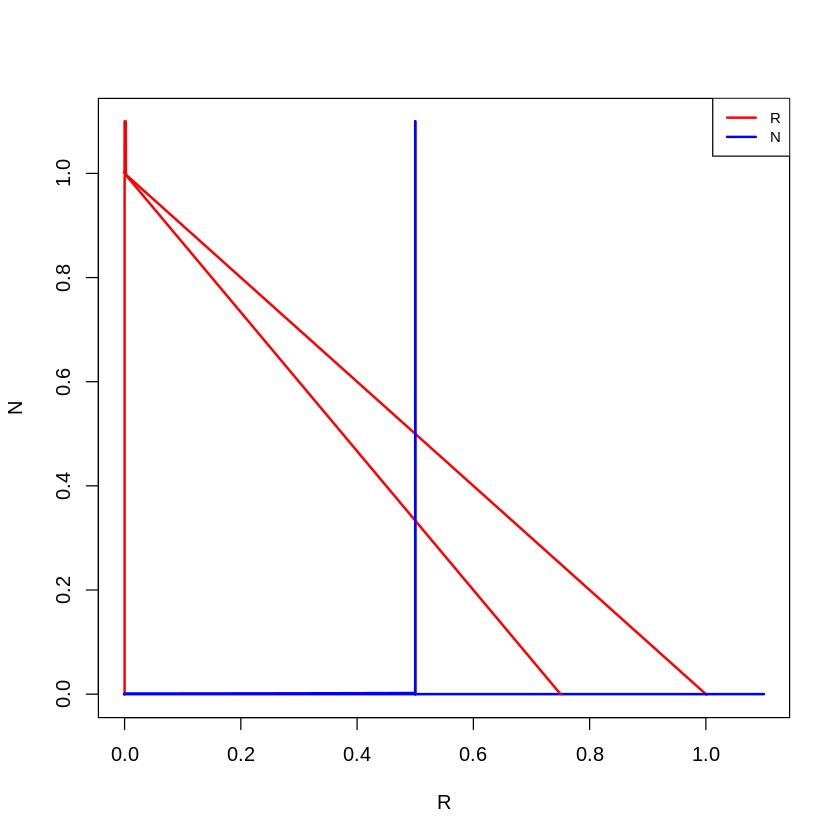

In [19]:
plane(xmin = -0.001, ymin = -0.001)
p["K"] <- 0.75
plane(add = TRUE)


Como puedes observar, modificar el valor de la capacidad de carga del recurso no modifica su valor en el equilibrio ¡pero sí el punto de equilibrio del depredador! :O

¿Cuáles son los puntos de equilibrio?

R         N 
0.5000000 0.3333333

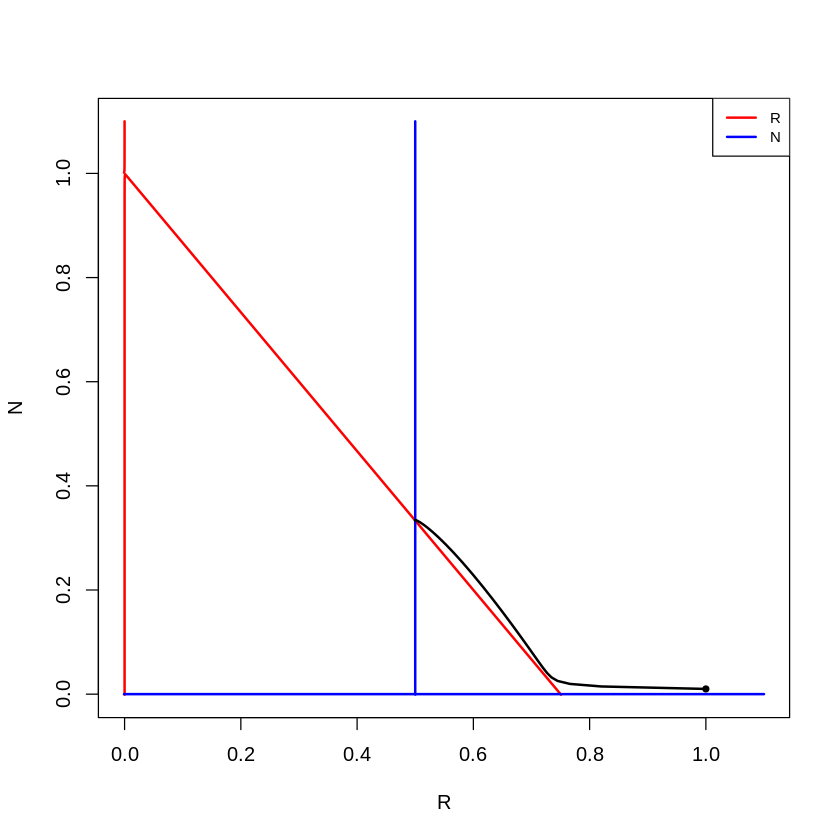

In [ ]:
plane(xmin = -0.001, ymin = -0.001)
run(traject = TRUE)

En el plano de fase se observa que existe dos puntos de equilibrio. Para determinar su estabilidad podemos usar el función *newton()*. Para esto debemos dar una condición inicial cercana al punto de equilibrio.  

   R    N 
0.75 0.00 
Unstable point, eigenvalues:  -1 0.25 


R    N 
0.75 0.00

        R         N 
0.5000000 0.3333333 
Stable point, eigenvalues:  -0.3333333+0.2357022i -0.3333333-0.2357022i 


R         N 
0.5000000 0.3333333

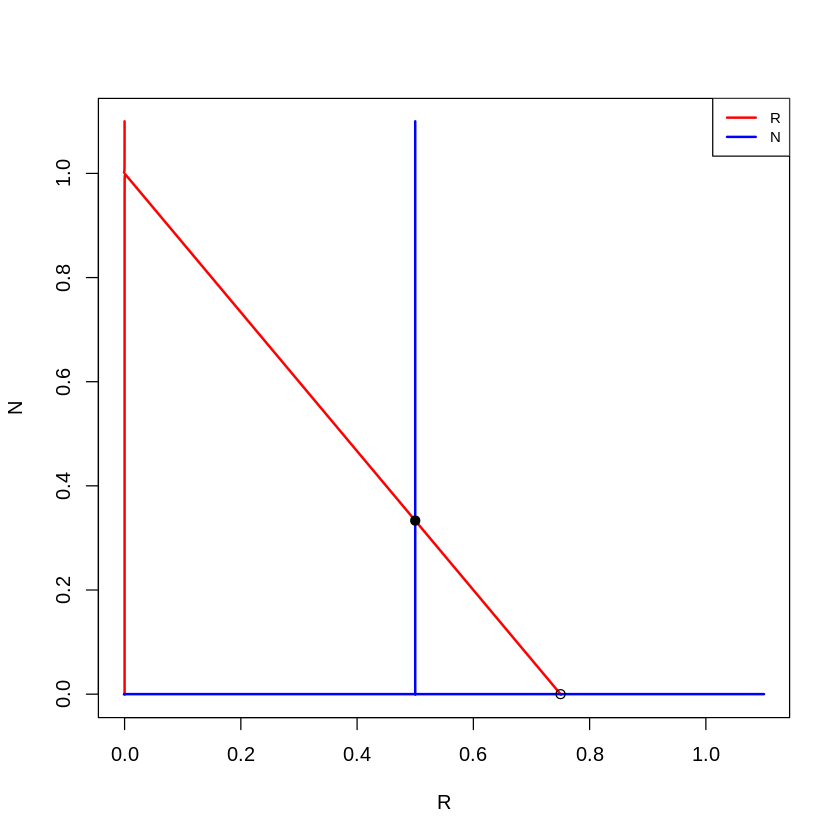

In [ ]:
plane(xmin = -0.001, ymin = -0.001)
newton(s, plot = TRUE)
newton(c(R=0.5, N = 0.3), plot = TRUE)

 Con la function *newton()* confirmamos que existe un punto de equilibrio estable en $(R_{ss} = 0.5, N_{ss} = 0.333)$ (la parte real de los eigenvalores es negativa) y un punto de equilibrio inestable en $(R_{ss} = 0.75, N_{ss} = 0)$ (un eigenvalor es positivo). 

¿Cómo depende el punto de equilibrio del valor del parámetro K?

        R         N 
0.5000000 0.3333333 
Stable point, eigenvalues:  -0.3333333+0.2357022i -0.3333333-0.2357022i 
Starting at K = 0.75 with:
        R         N 
0.5000000 0.3333333 
Bifurcation at K = 0.5 


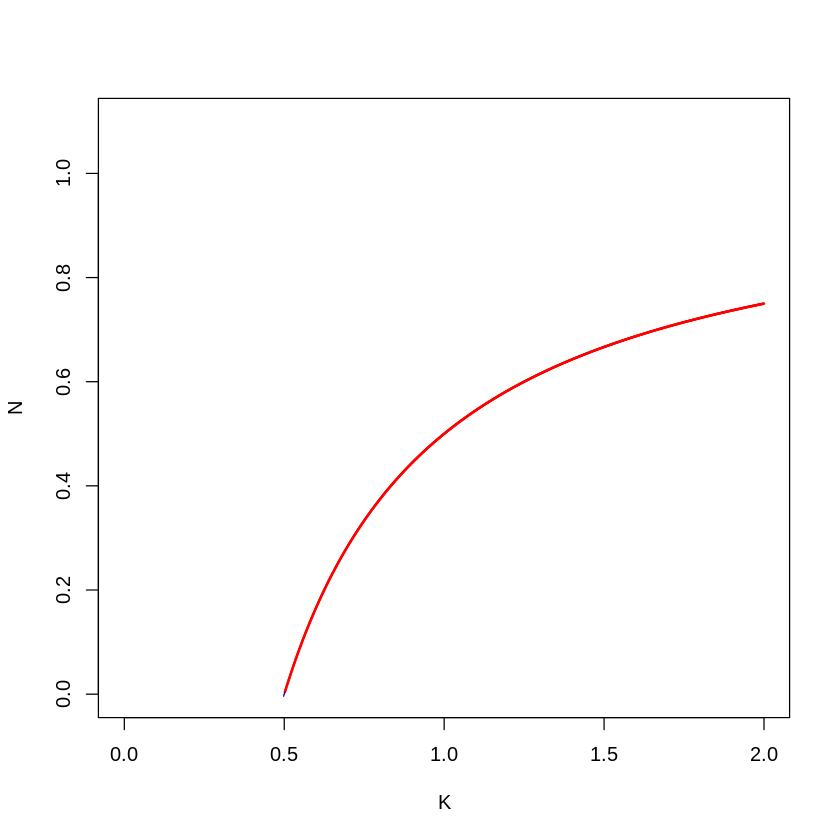

In [ ]:
f <- newton(c(R=0.5, N=0.5))
continue(f, x = "K", xmax = 2, y = "N",step=0.001)

¿Cómo se distribuye el campo de velocidades en el plano de fase?

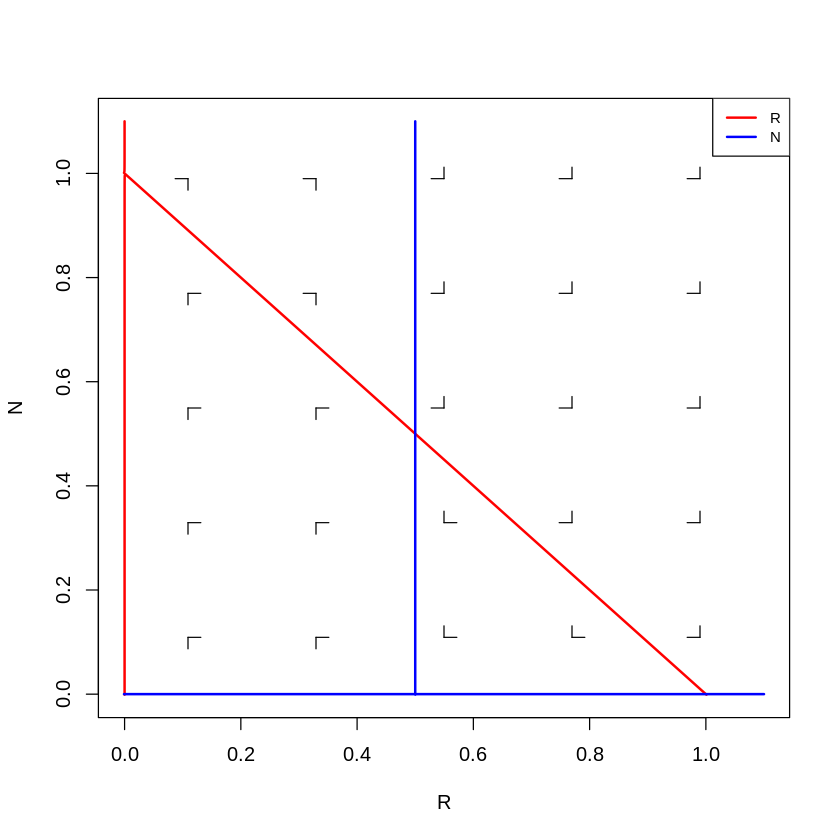

In [7]:
plane(xmin = -0.001, ymin = -0.001, vector = T)

## Modelo del operón Lac 

In [24]:
model <- function(t, state, parms) {
  with(as.list(c(state, parms)), {

    R = 1/(1+A^n)
    dA = M*L - delta*A - v*M*A
    dM = c0 + c*(1-R) - d*M

    return(list(c(dA, dM)))

  })
}

Establecer vector de parámetros y condiciones iniciales

In [32]:
p <- c(L = 1, c = 1, c0 = 0.05, d = 1, delta = 0.2, n = 5, v = 0.25)
s <- c(A = 0, M = 0)

Graficar plano de fase y puntos de equilibrio. 

En la functión *newton()*, el valor del punto debe estar cercano al punto de quilibrio que se quiere encontrar. Para guiarnos, podemos usar el plano de fase

         A          M 
0.23872213 0.05077469 
Stable point, eigenvalues:  -1.01891 -0.1937837 
        A         M 
0.6528856 0.1560474 
Unstable point, eigenvalues:  -1.486854 0.2478418 
       A        M 
2.254337 1.033115 
Stable point, eigenvalues:  -1.028194 -0.4300848 


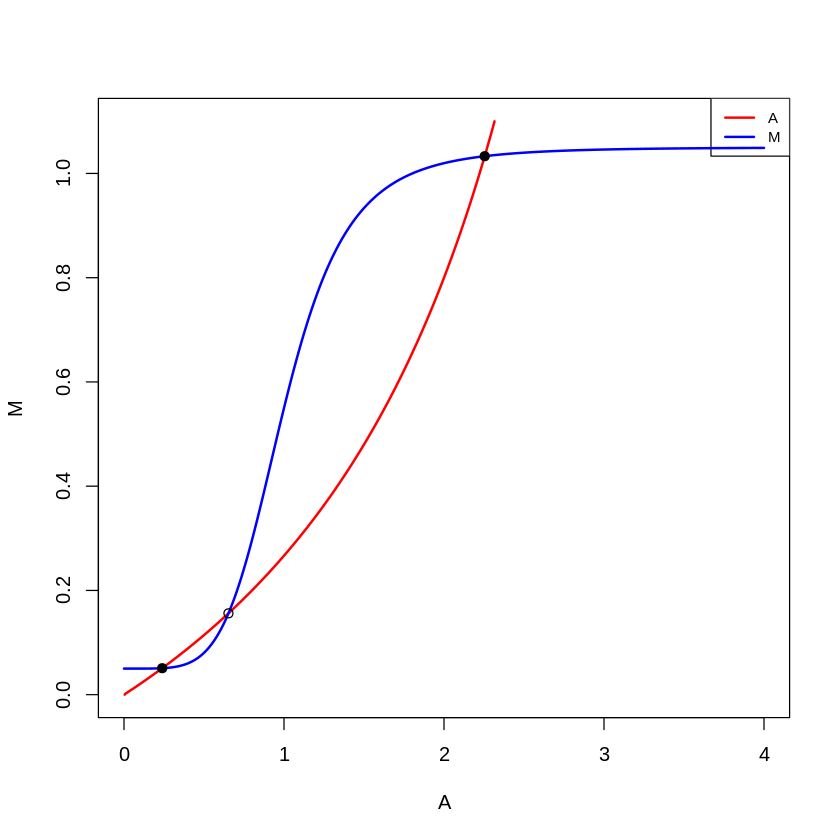

In [33]:
plane(xmax = 4)
low <- newton(s, plot = TRUE)
mid <- newton(c(A = 0.8, M = 0.2), plot = TRUE)
hig <- newton(c(A = 2, M = 1), plot = T)

Se observa que hay dos punto estables y uno inestable. Además, dado que los eigenvalores de los puntos estables son números reales positivos sabemos que son de tipo nodo estable. Por otro lado, los eigenvalores del punto inestable tienen diferente signo, por lo tanto, es un punto silla. 

¿Qué efecto tiene el parámetro $L$ sobre los puntos de equilibrio?

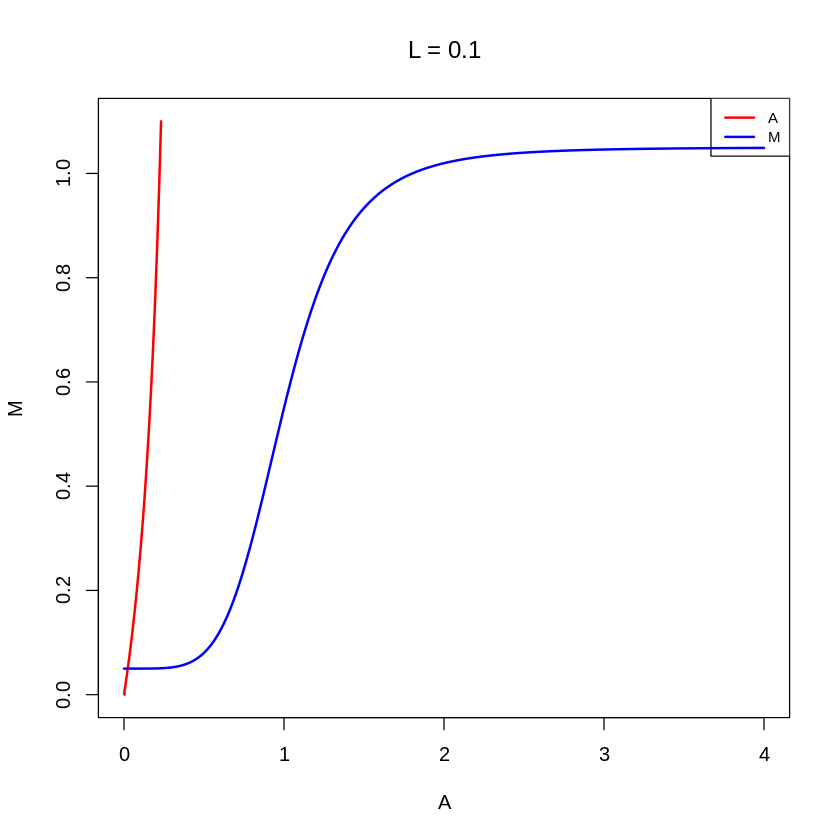

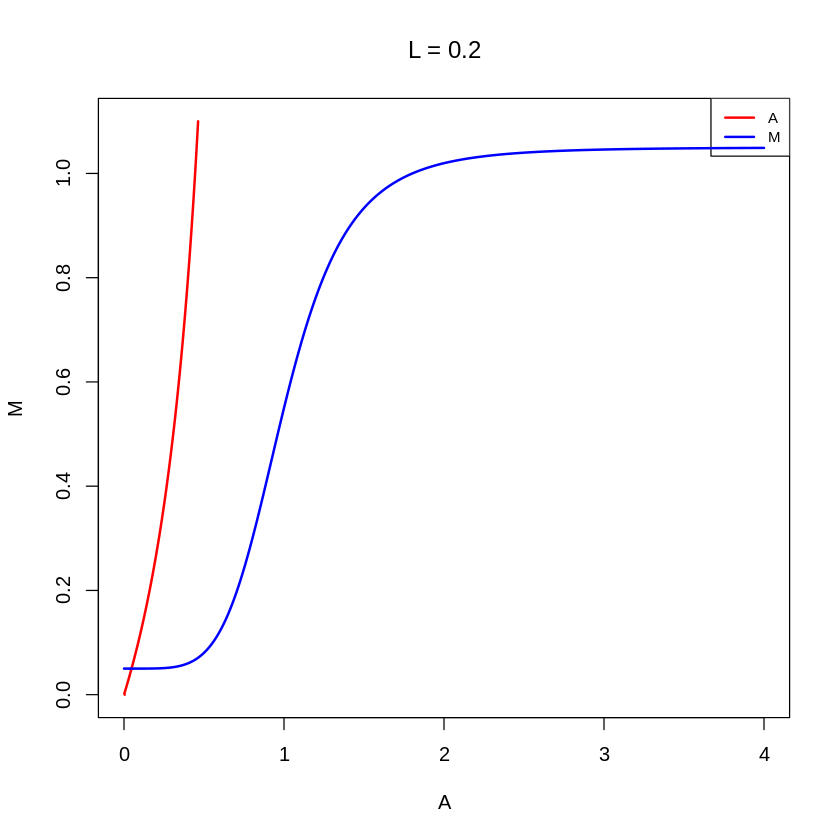

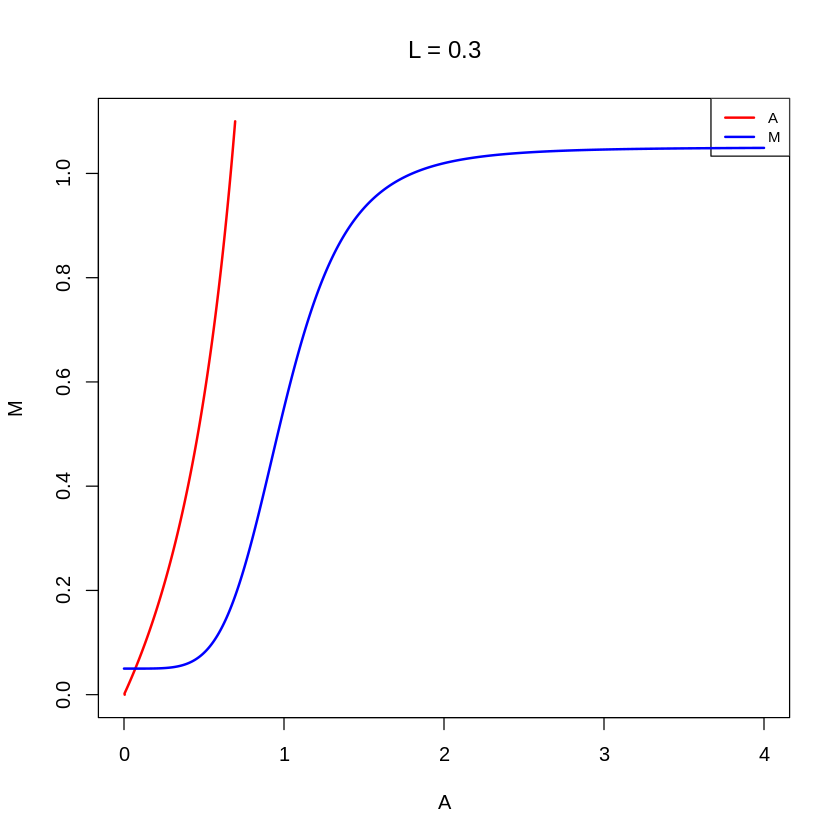

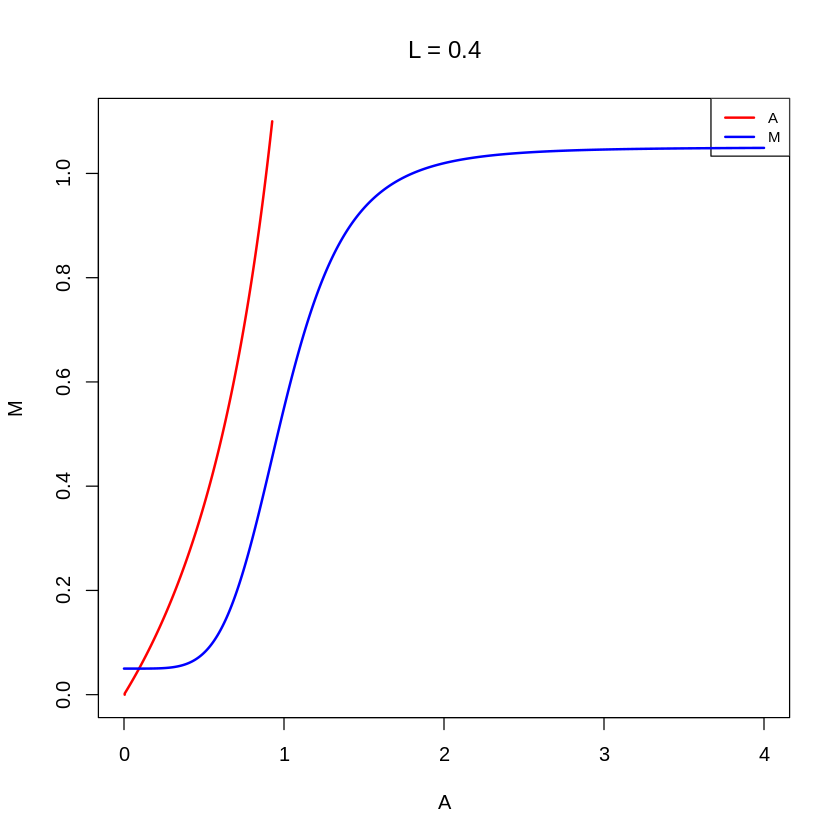

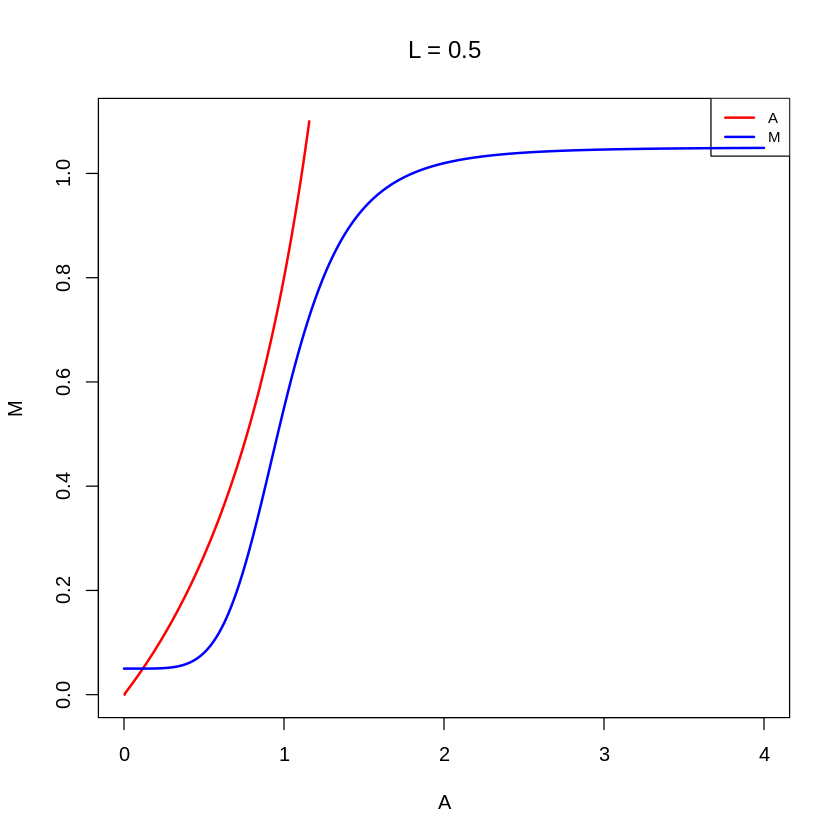

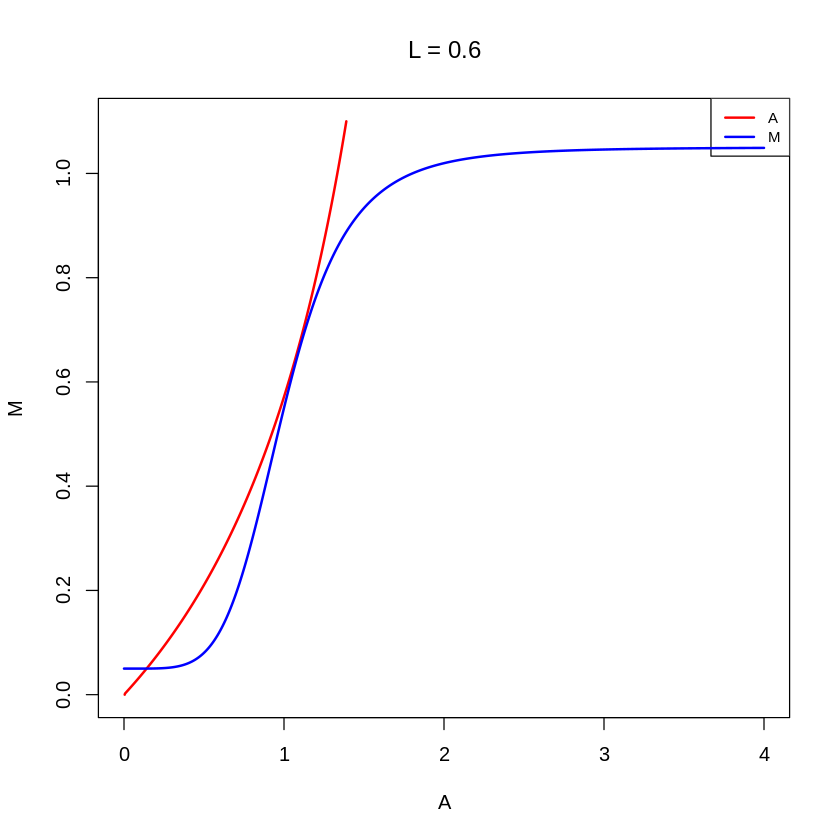

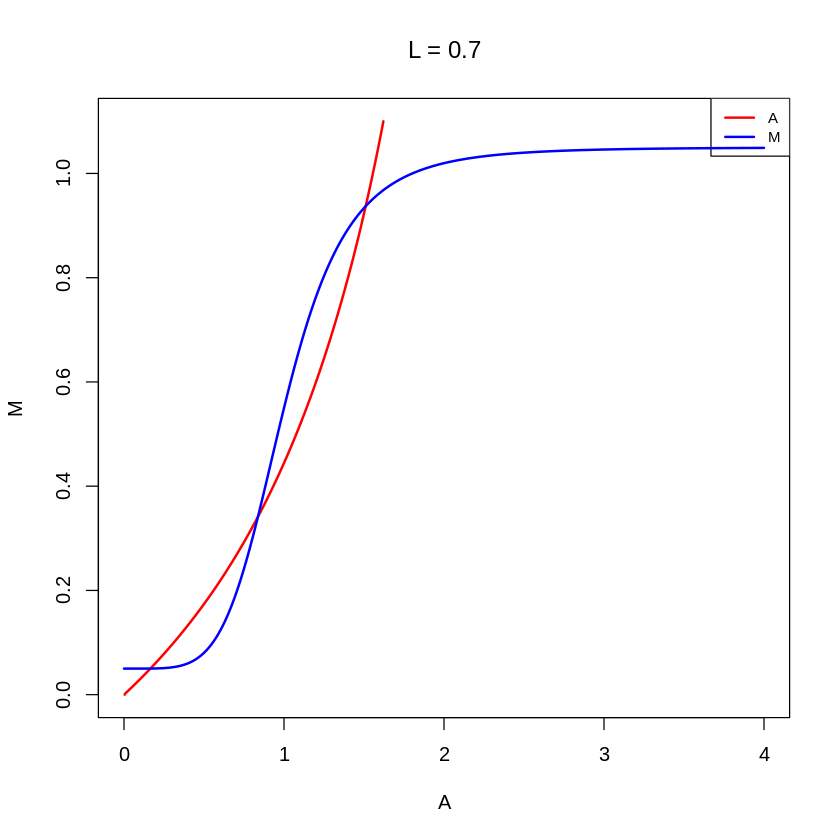

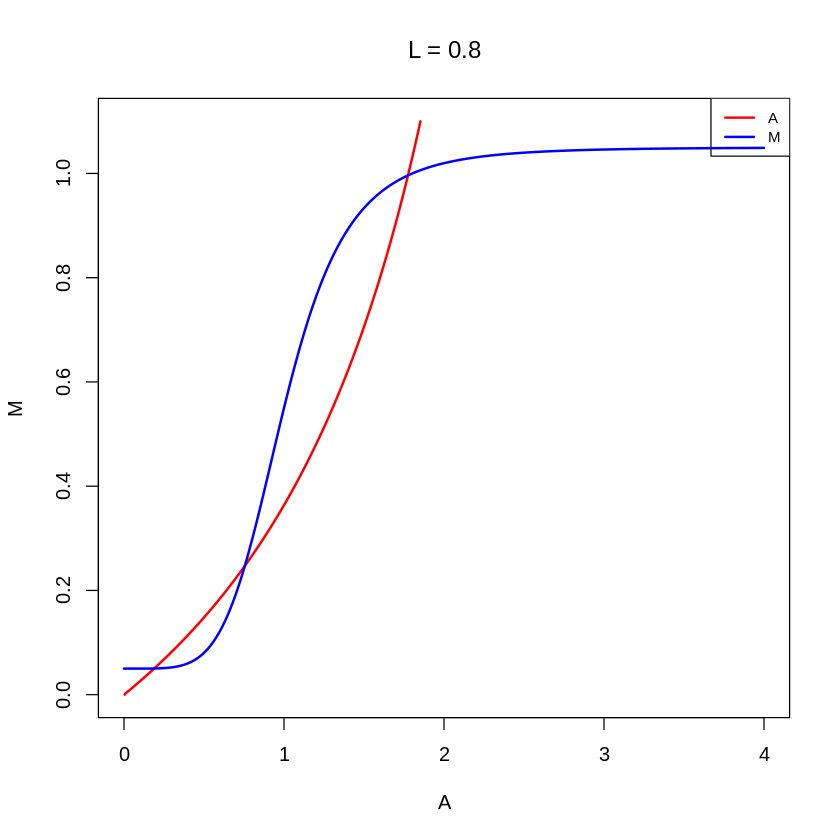

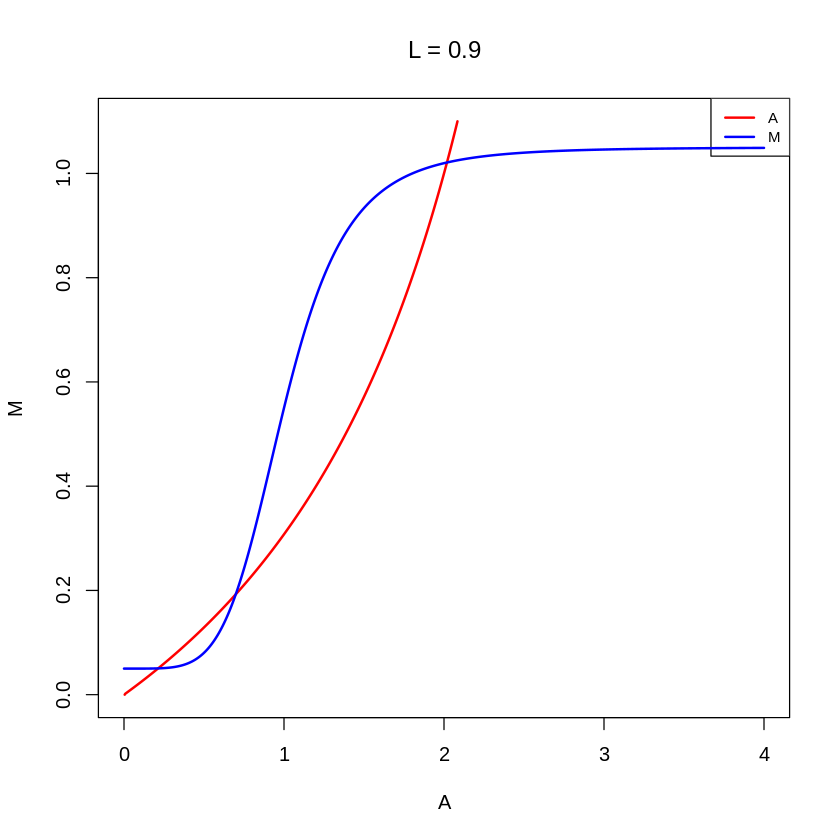

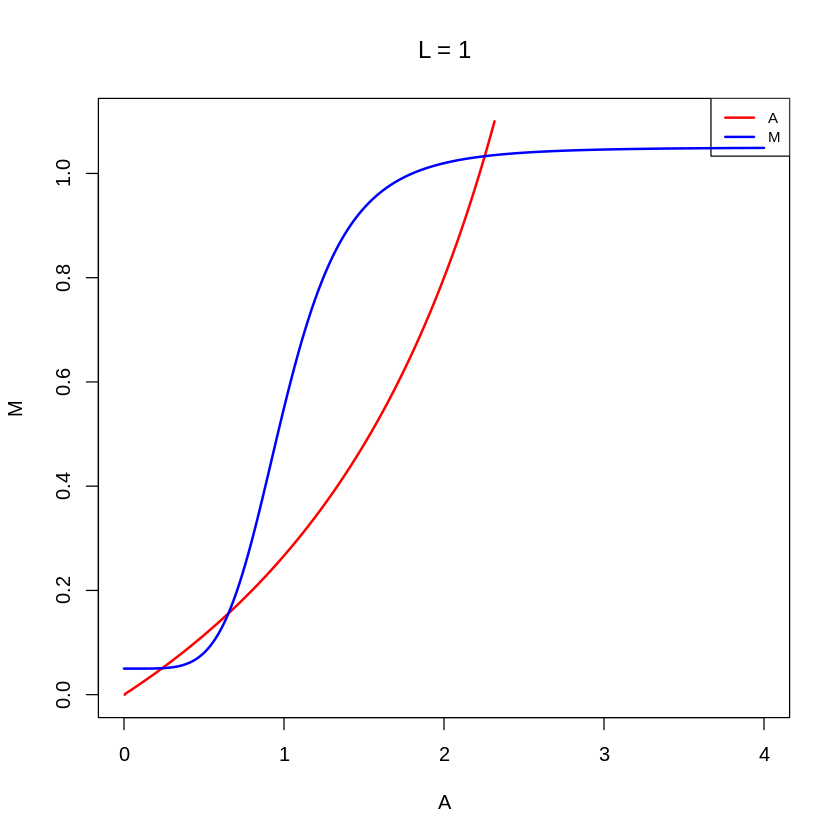

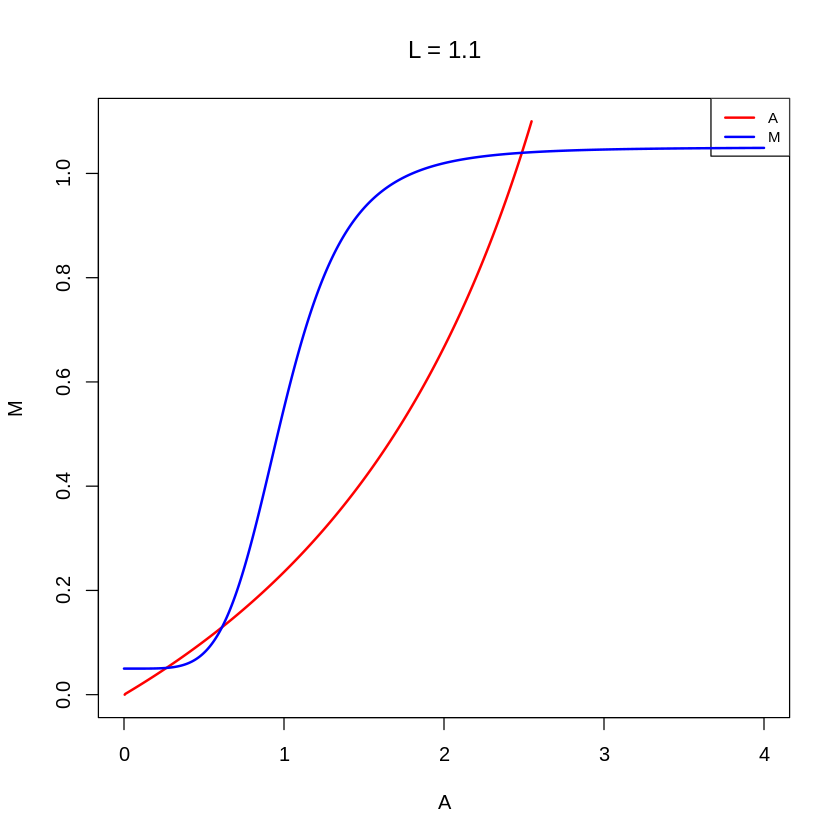

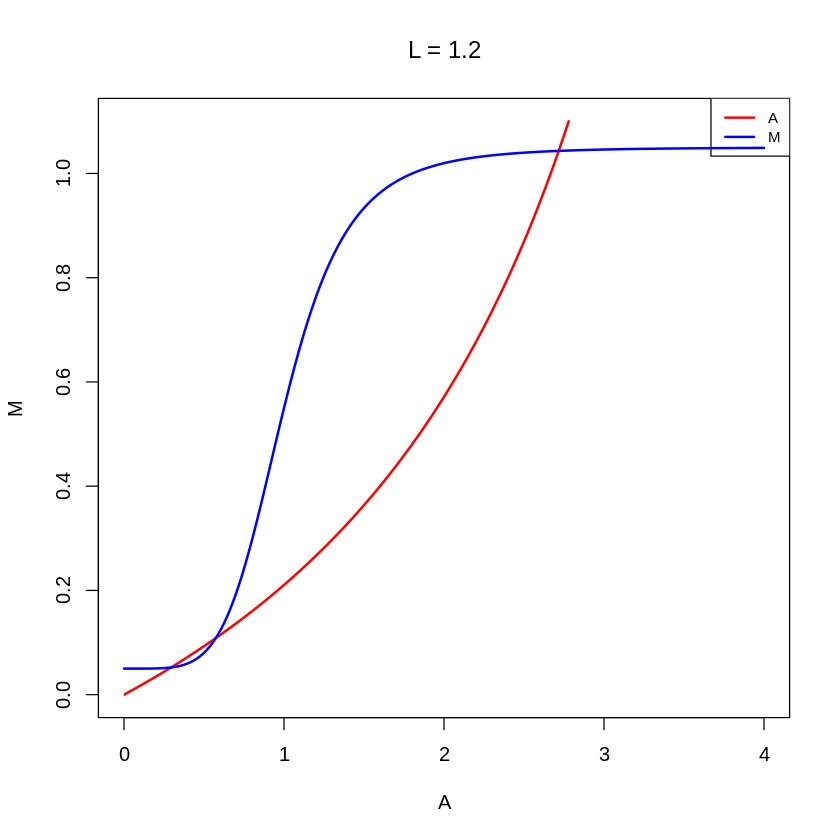

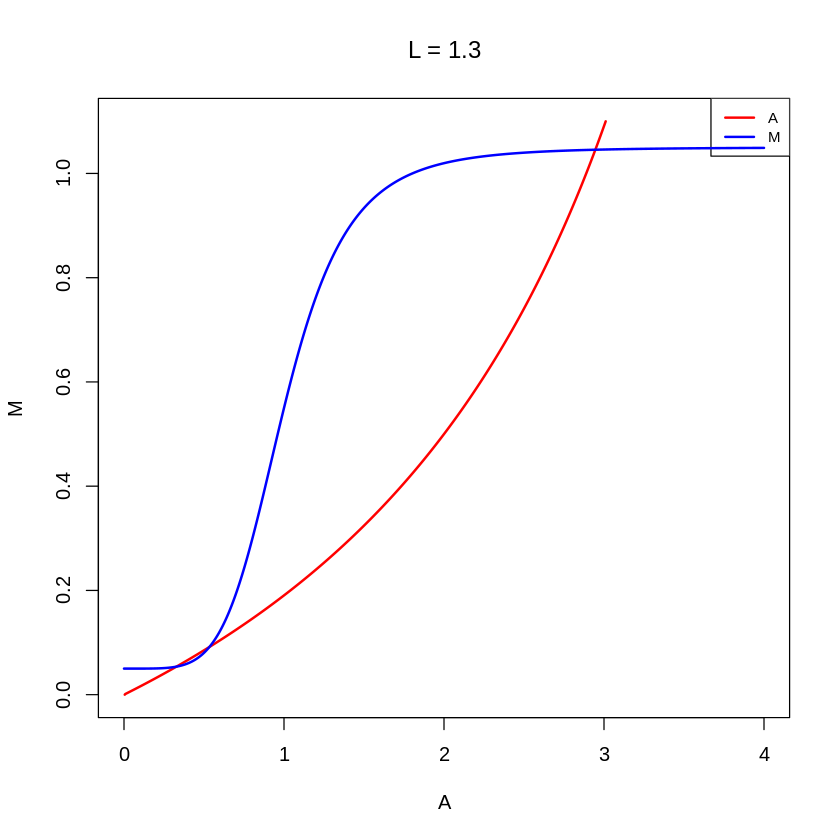

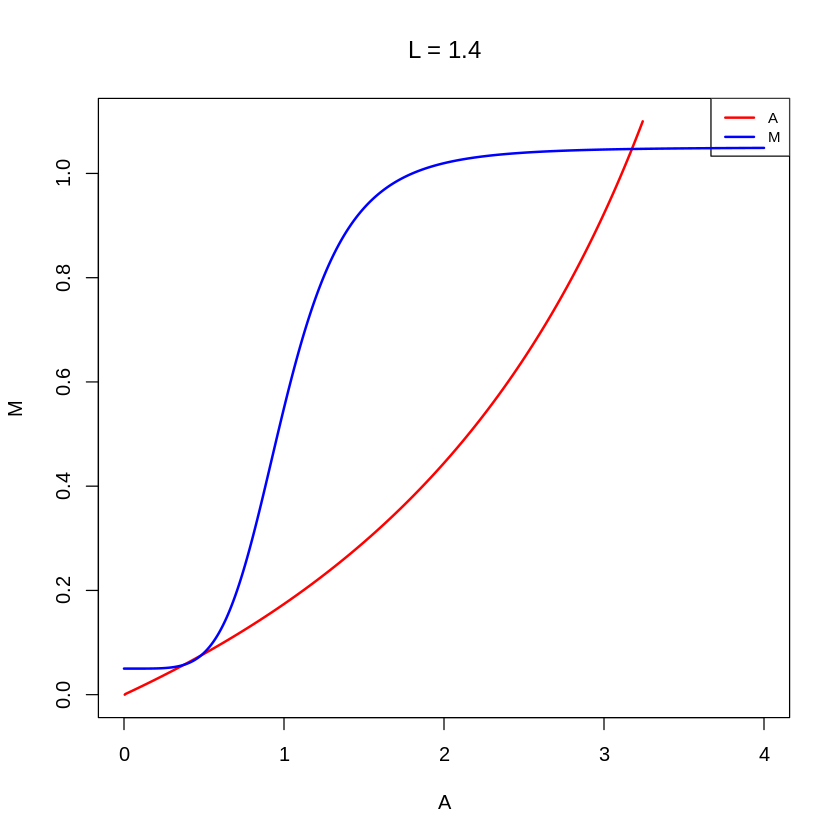

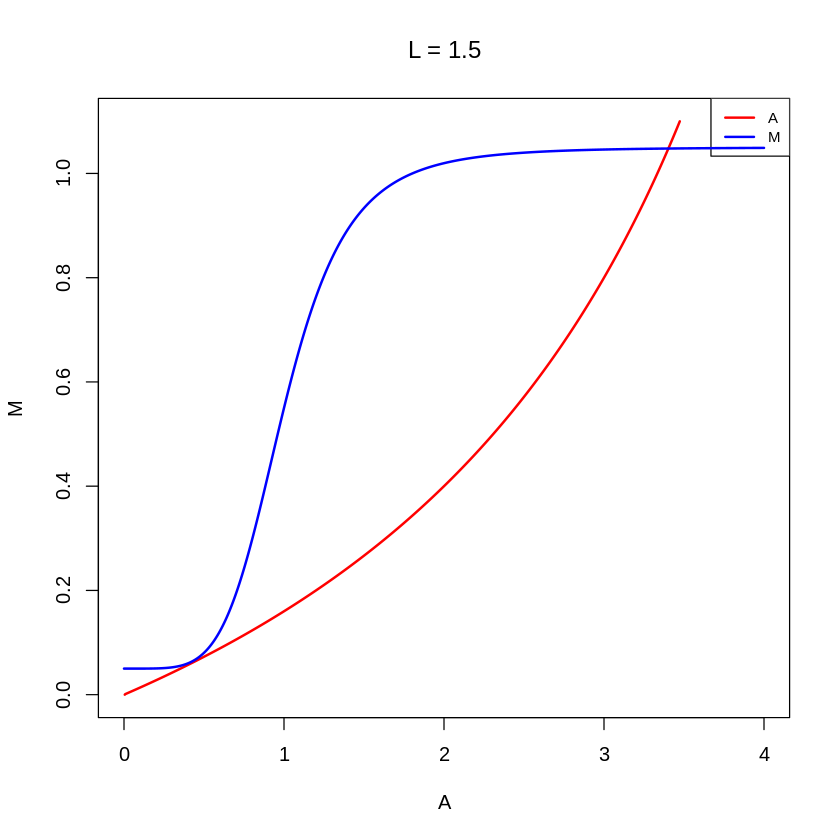

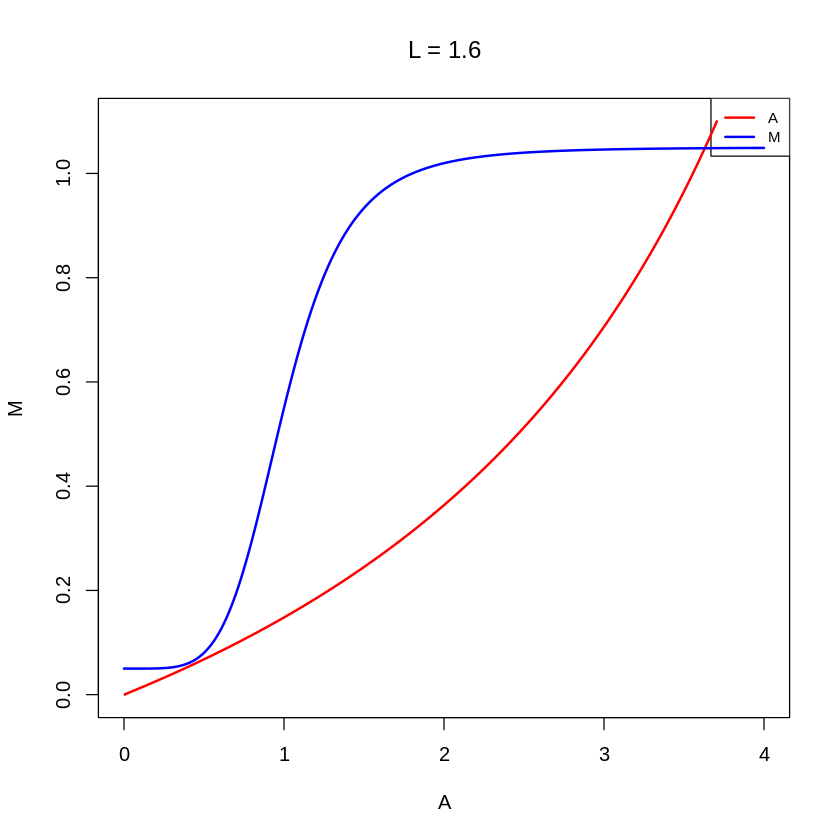

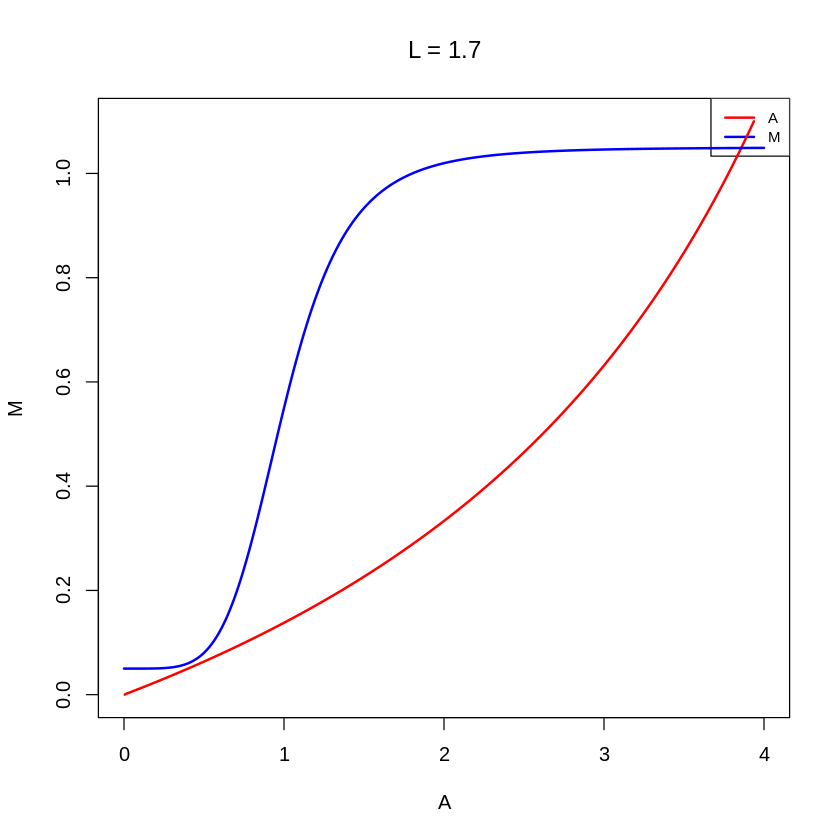

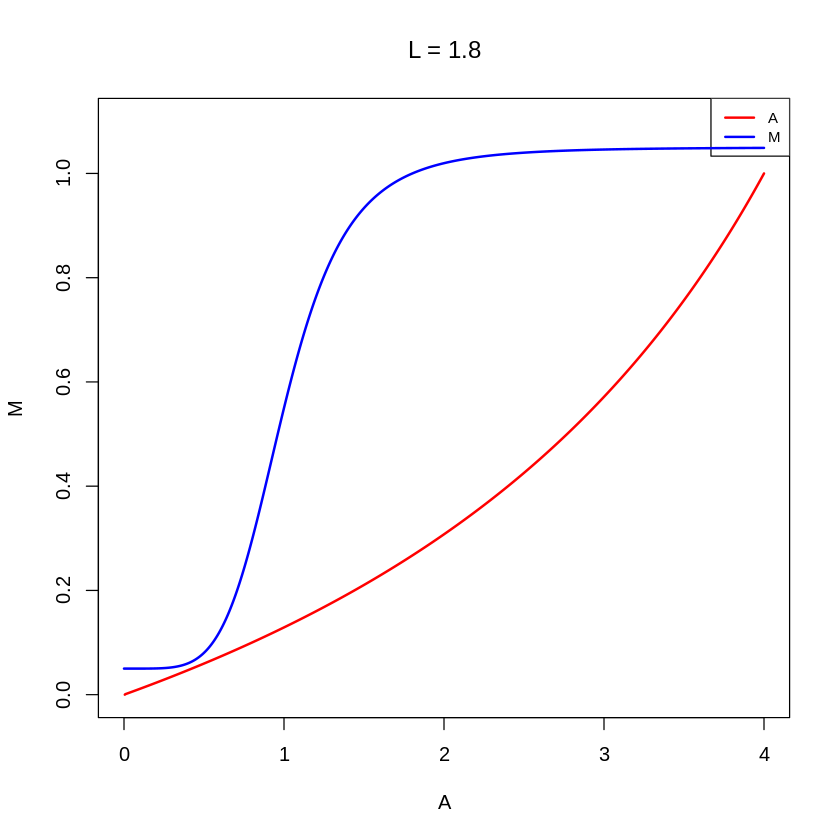

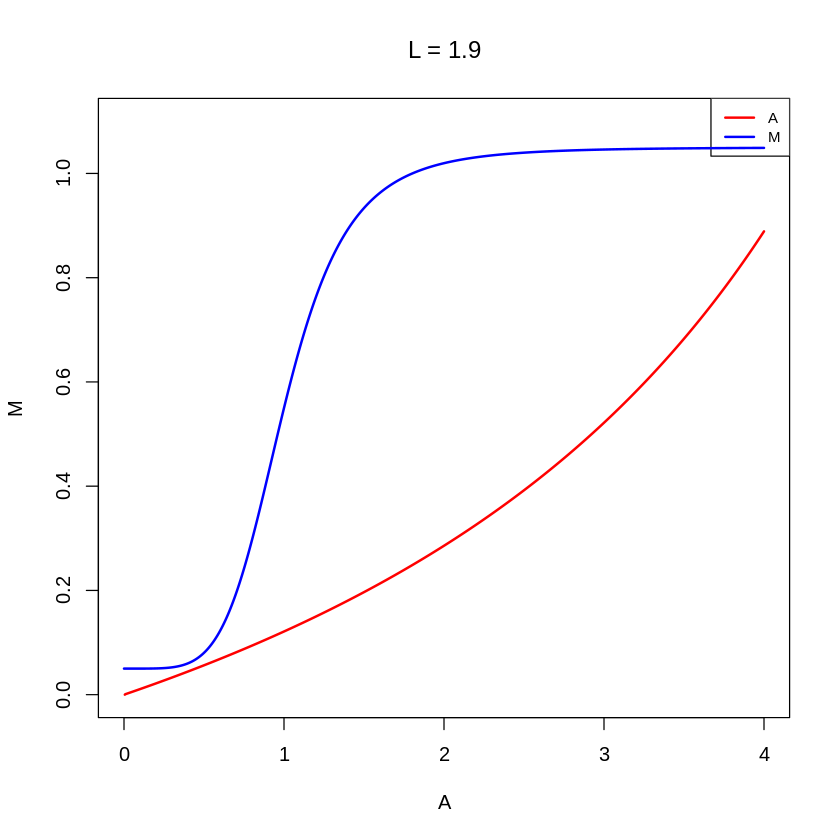

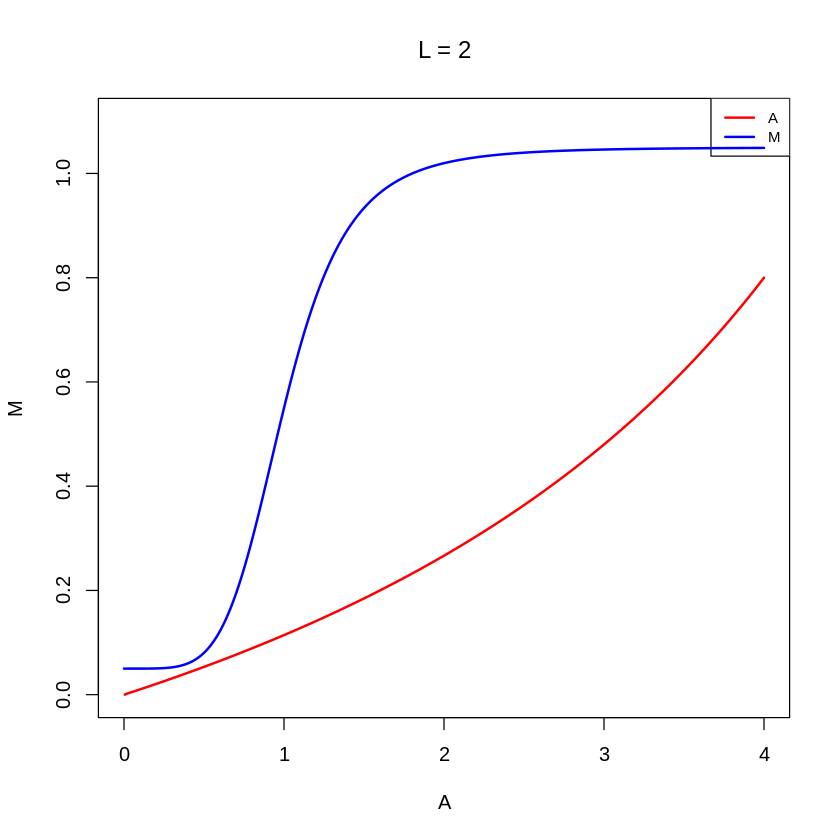

In [28]:
for(L in seq(from = 0.1,to = 2, by = 0.1)){
  p["L"] <- L
  plane(xmax = 4,main = paste0("L = ", L))
}

Para averiguar esto podemos hacer un diagrama de bifurcación en el que sigamos es punto de equilibrio *mid* como función de la concentración externa de lactosa $L$

Starting at L = 1 with:
        A         M 
0.6528856 0.1560474 
Turning point point at L = 1.441094 
Turning point point at L = 0.6048437 


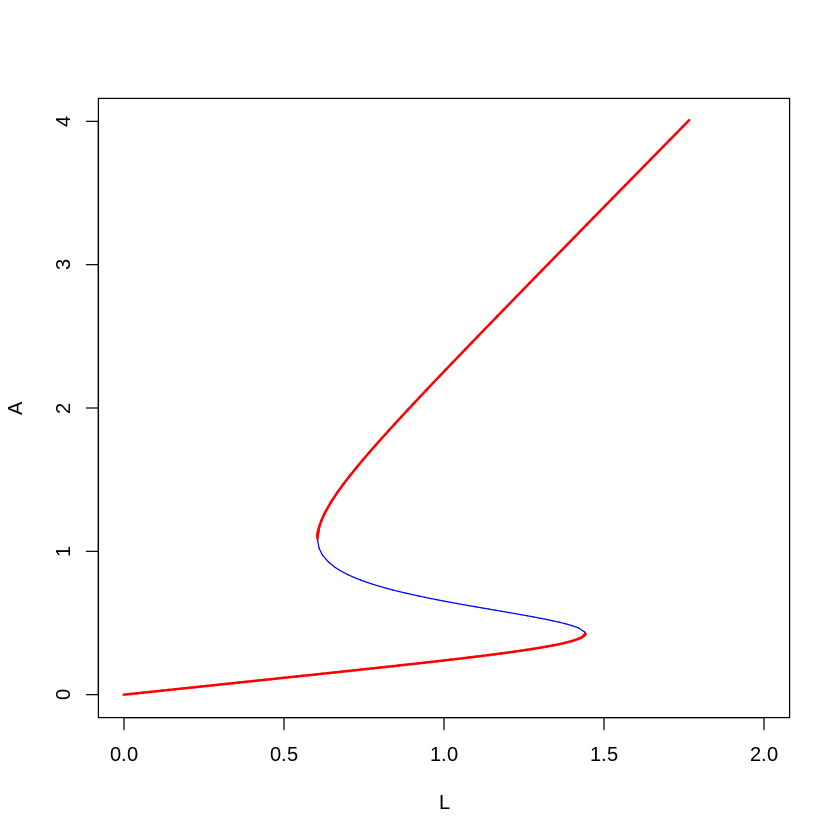

In [35]:
continue(mid, x = "L", y = "A", xmax = 2, ymax = 4)

De acuerdo con el digrama de bifurcación, se presenta un cambio en el número de puntos de quilibrio en el valor de $L$ = 0.604 y $L$ = 1.441. Si revisas las figuras del código anterior, verás que es justo aquí cuando las ceroclinas cambian el número de intersecciones. 